# Nasa Asteroids Classification using Artificial Neural Network Architecture
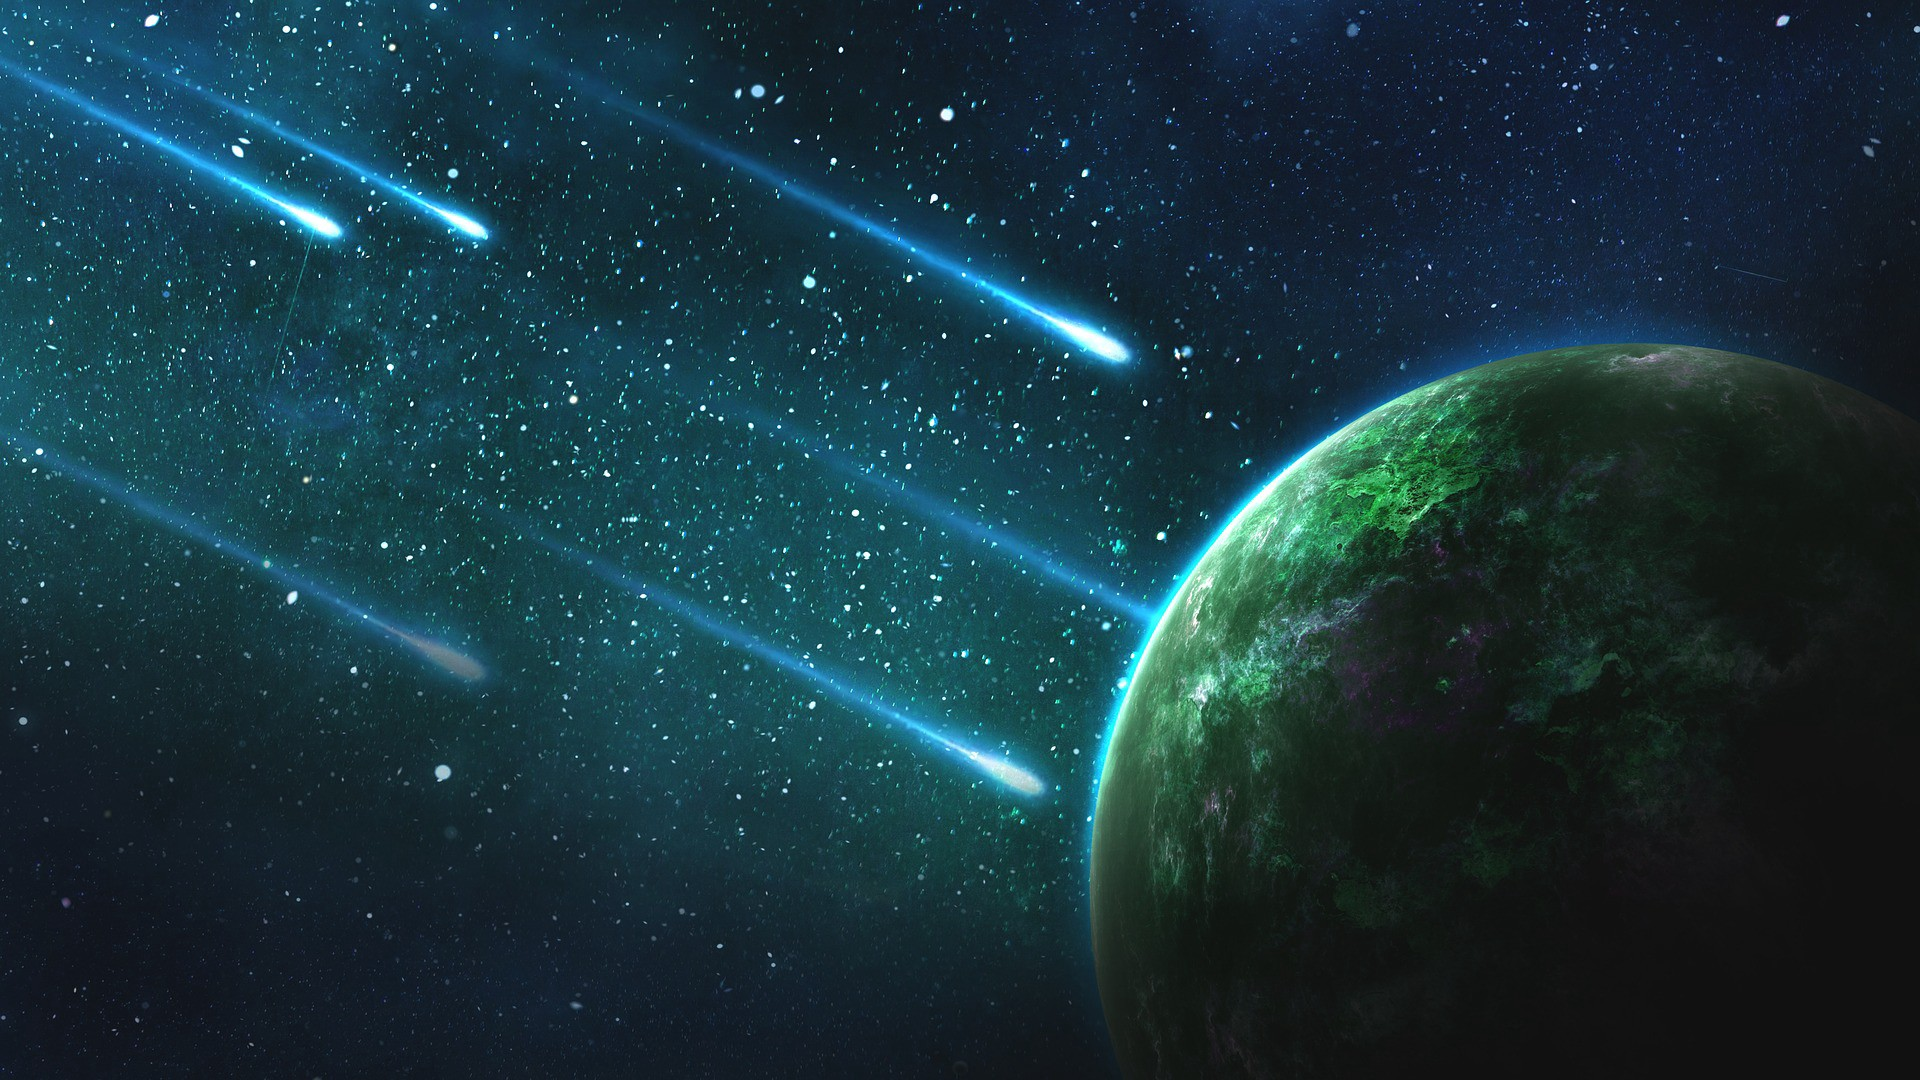

In [104]:
import numpy as np
import pandas as pd
import missingno as m
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Dataset Reading

In [105]:
df=pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [106]:
df.shape

(4687, 40)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [108]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Data Cleaning

<AxesSubplot:>

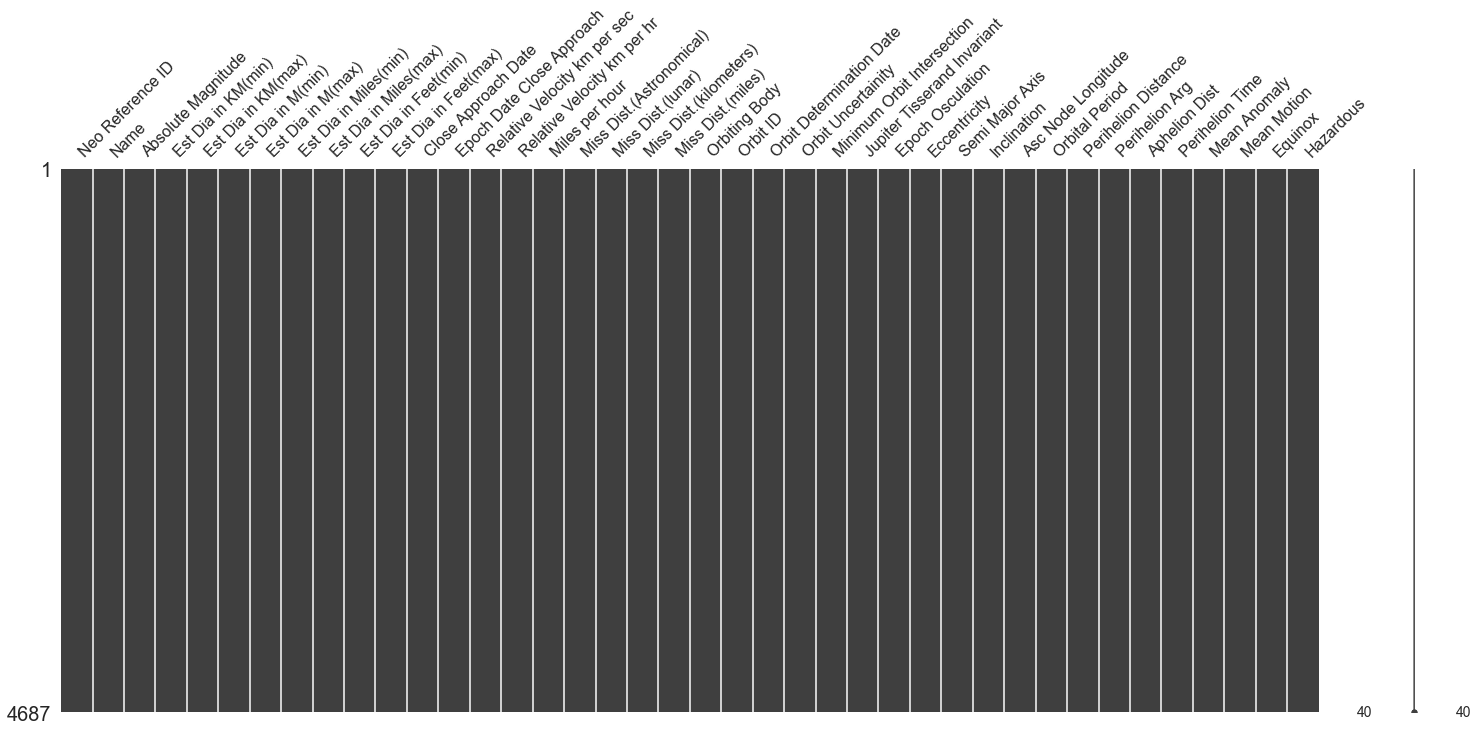

In [109]:
m.matrix(df)

### Data is Already Cleaned
# Data Analysis

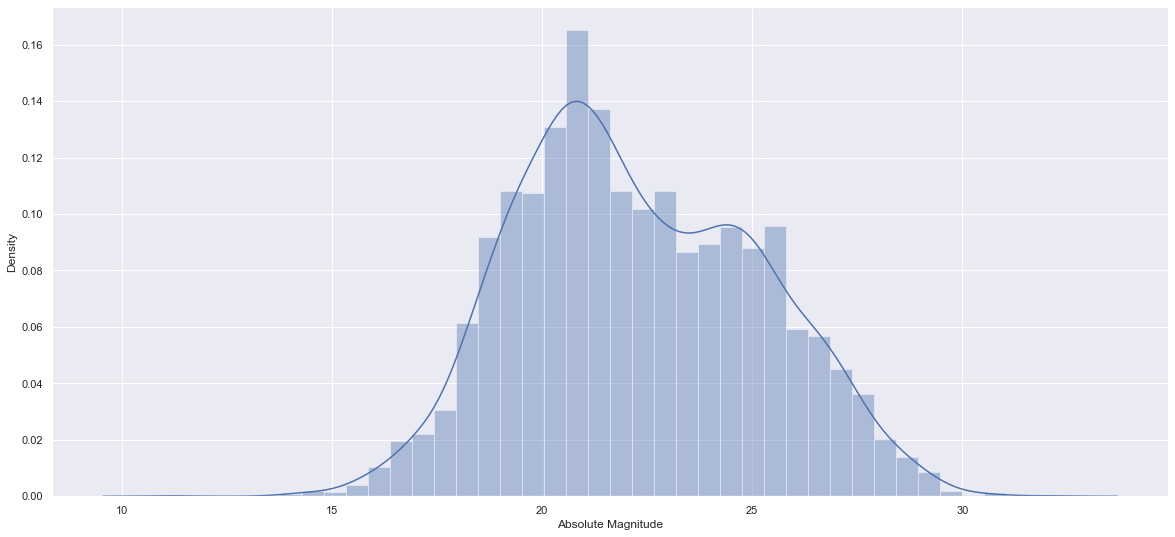

In [110]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Absolute Magnitude'])
plt.show()

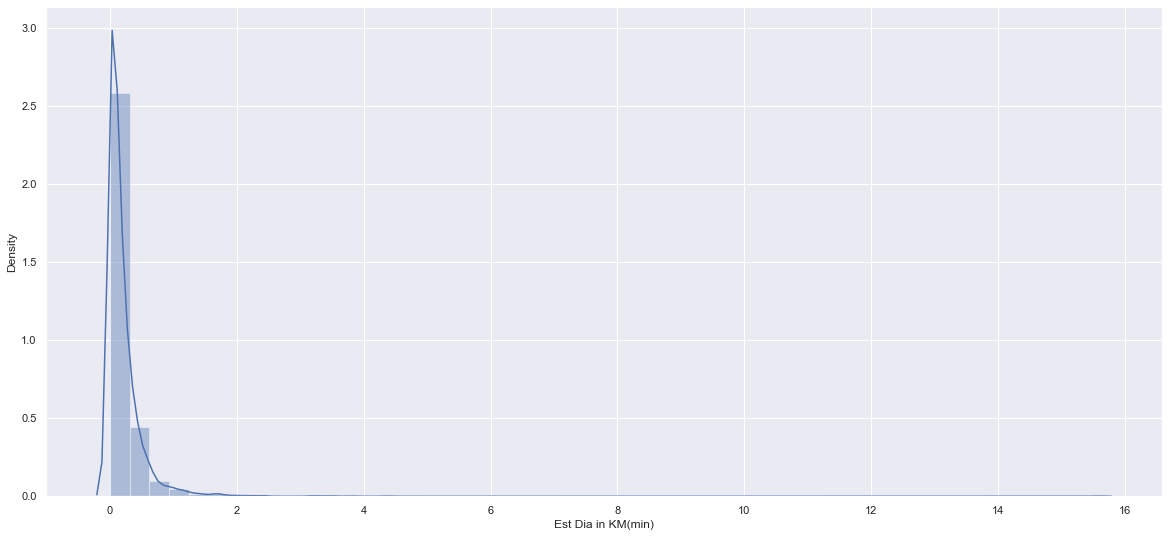

In [111]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in KM(min)'])
plt.show()

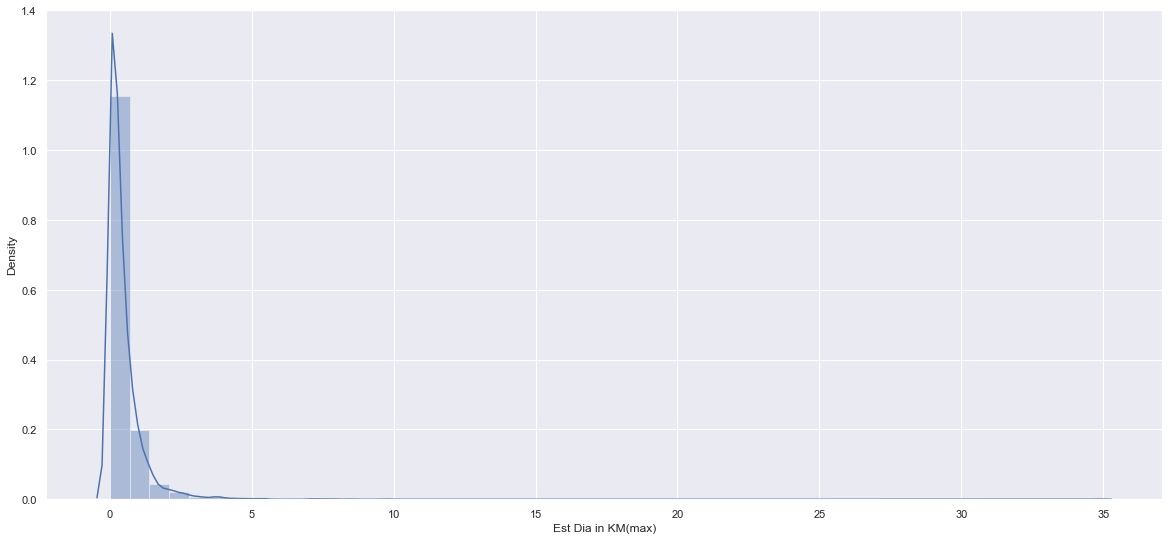

In [112]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in KM(max)'])
plt.show()

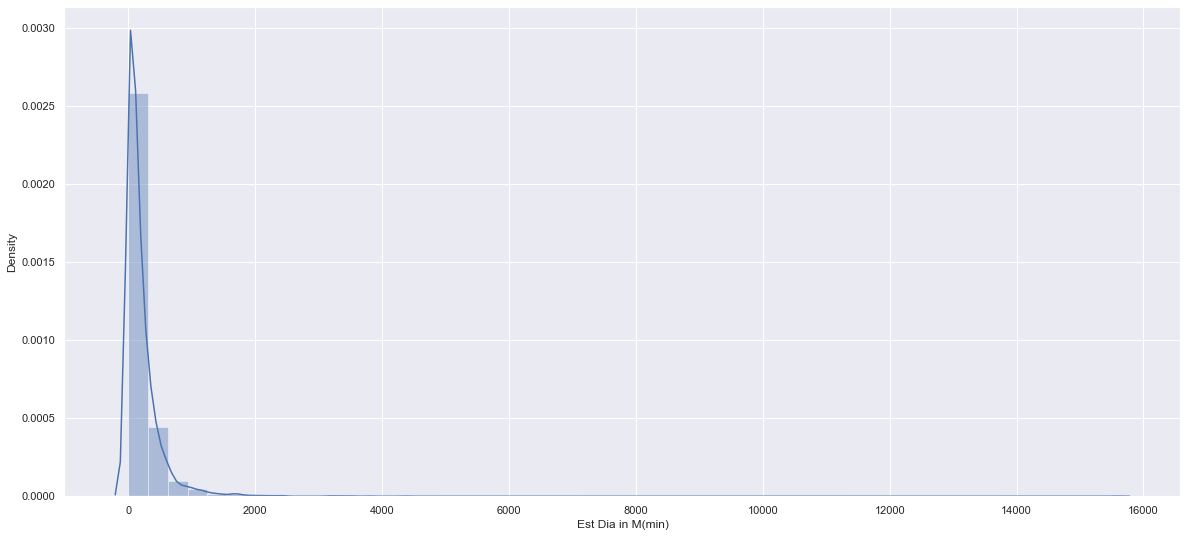

In [113]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in M(min)'])
plt.show()

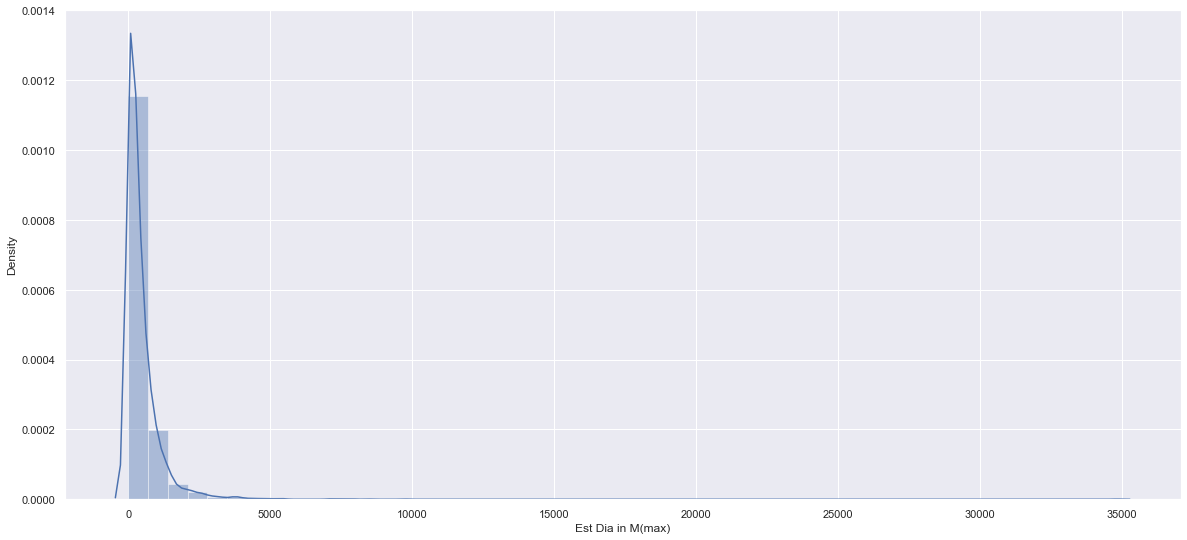

In [114]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in M(max)'])
plt.show()

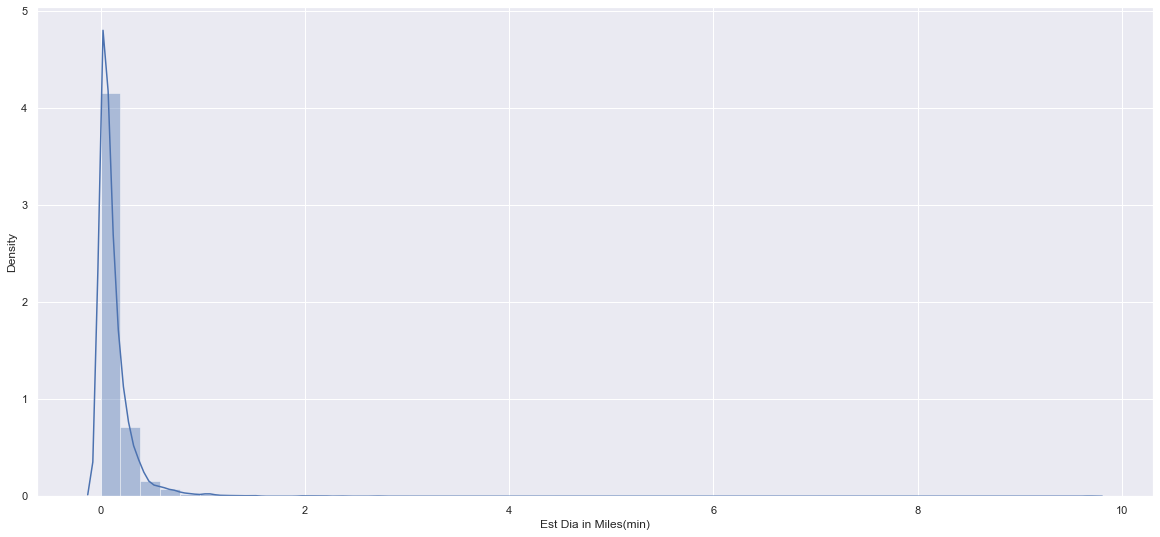

In [115]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in Miles(min)'])
plt.show()

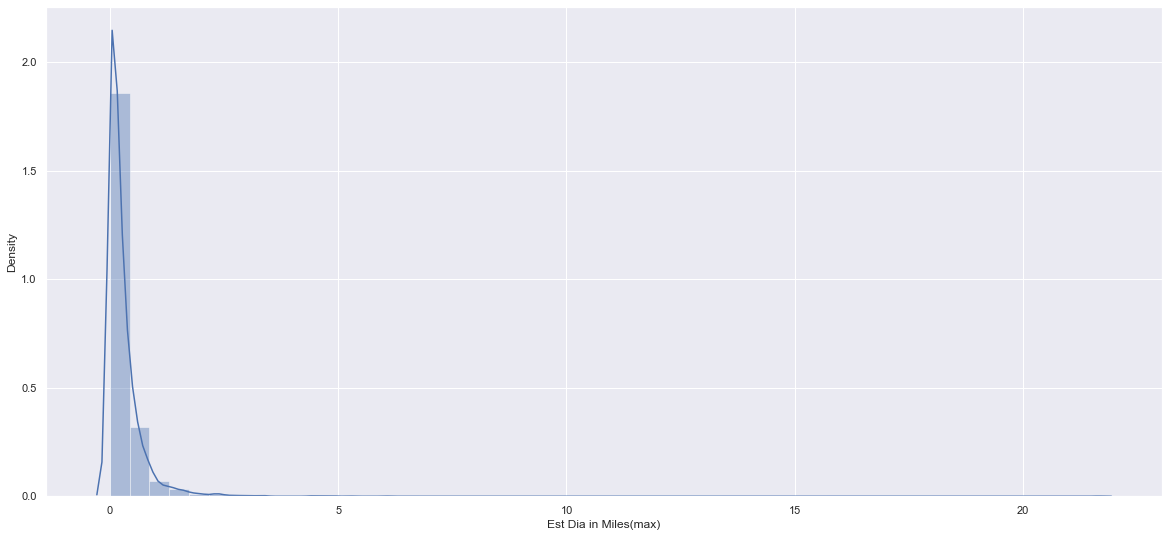

In [116]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in Miles(max)'])
plt.show()

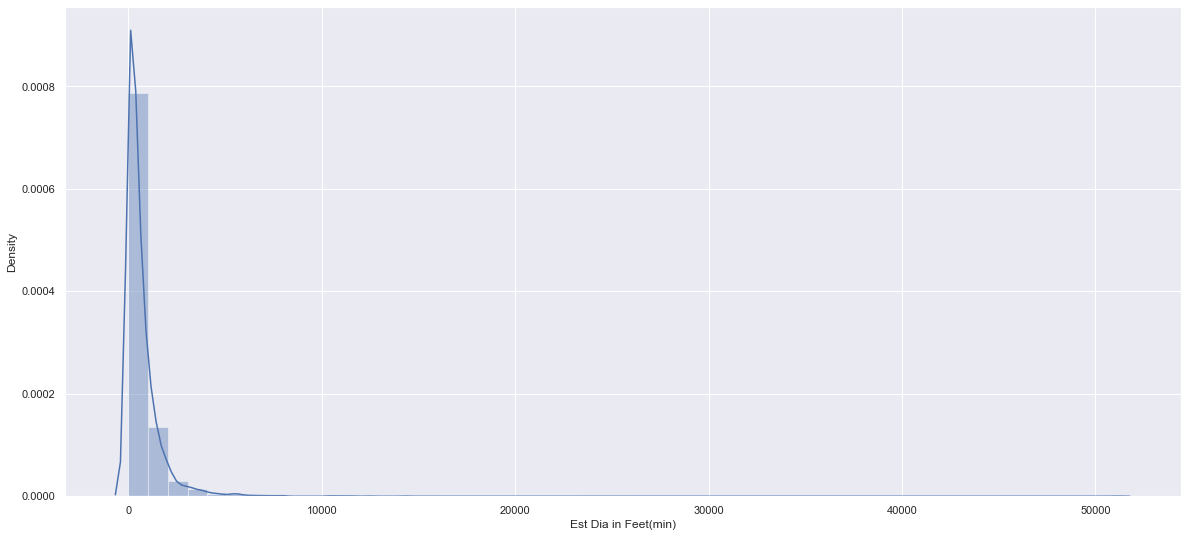

In [117]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in Feet(min)'])
plt.show()

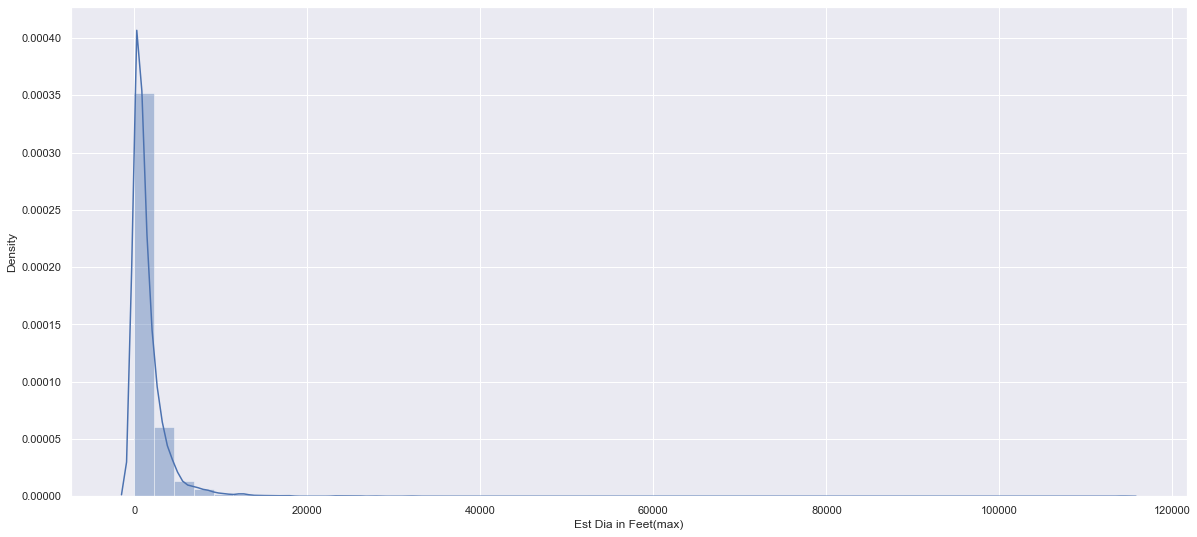

In [118]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Est Dia in Feet(max)'])
plt.show()

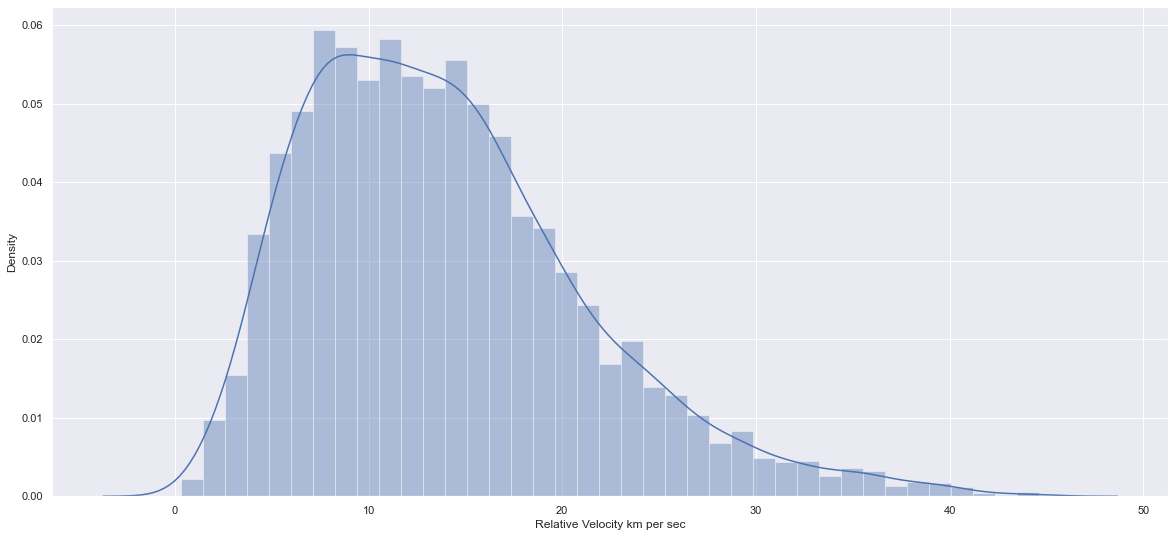

In [119]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Relative Velocity km per sec'])
plt.show()

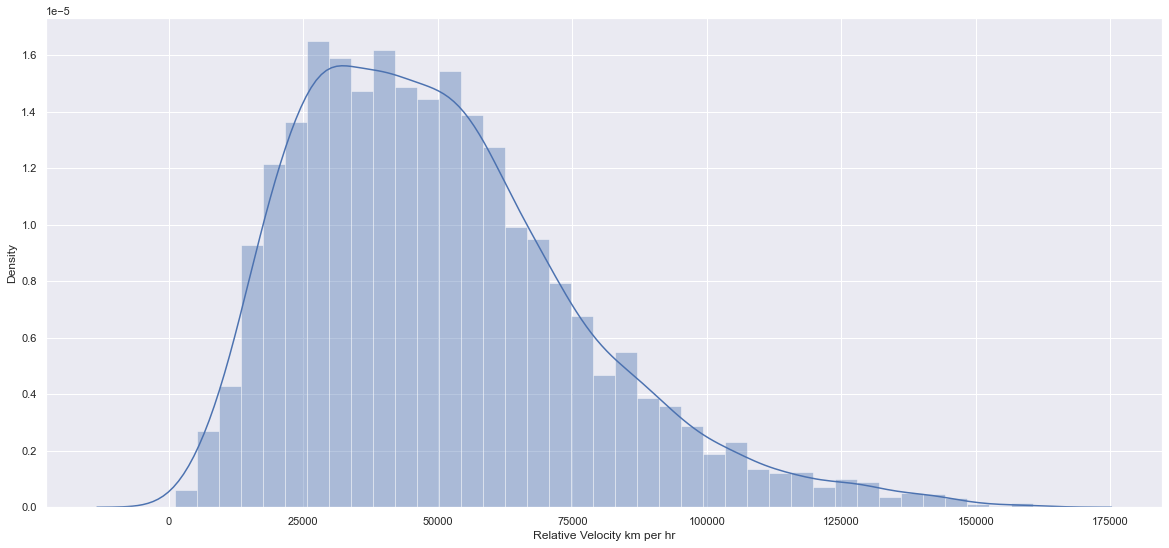

In [120]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Relative Velocity km per hr'])
plt.show()

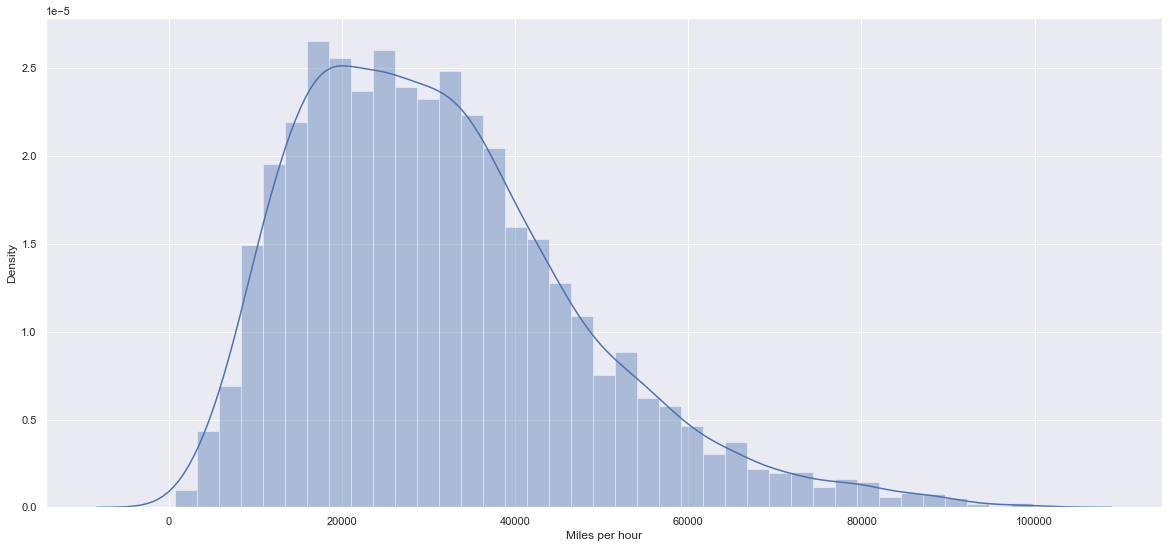

In [121]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Miles per hour'])
plt.show()

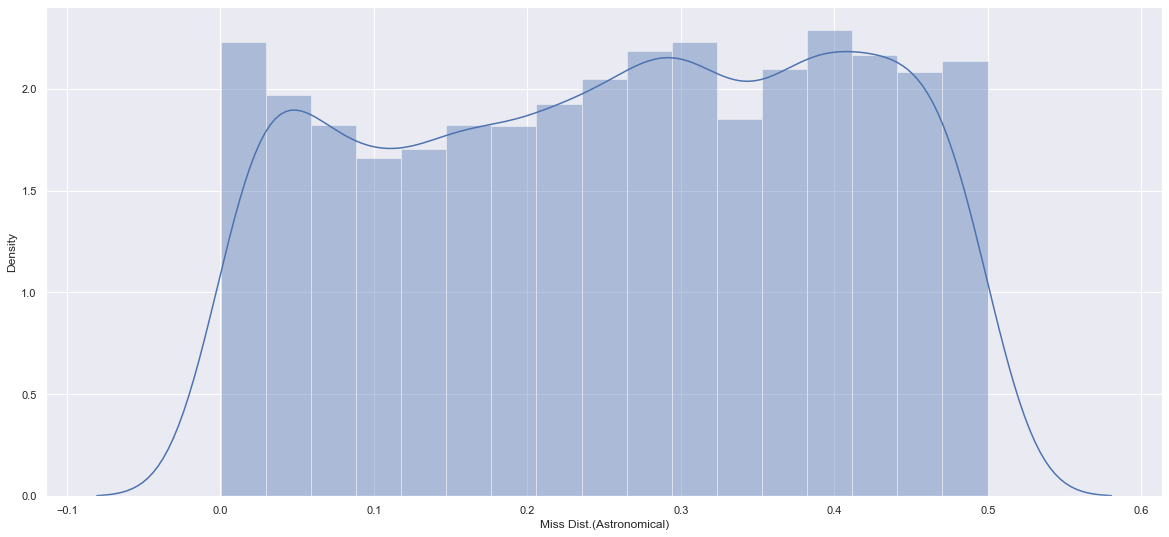

In [122]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Miss Dist.(Astronomical)'])
plt.show()

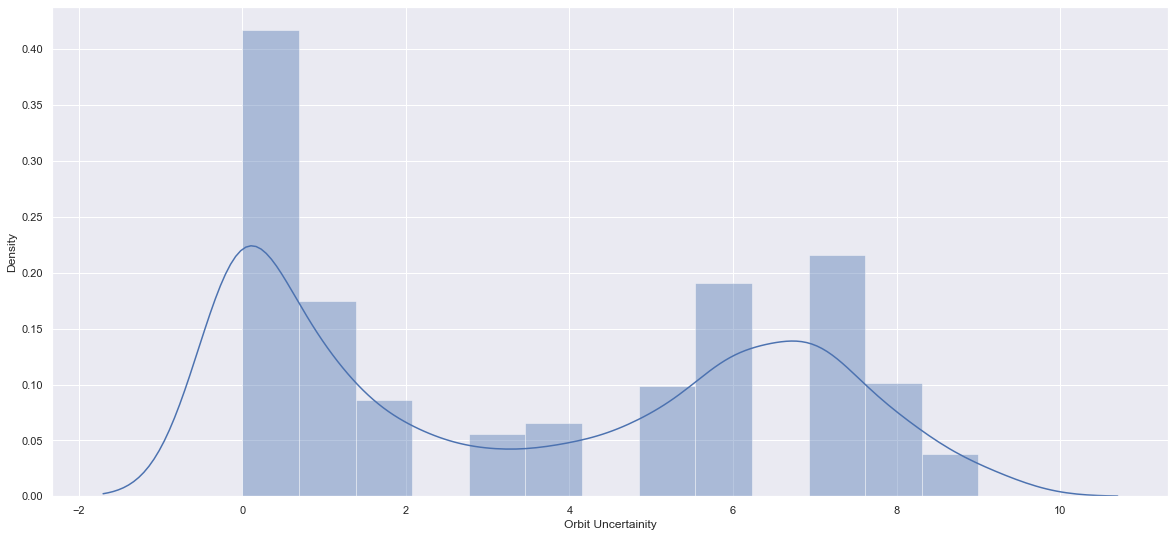

In [123]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Orbit Uncertainity'])
plt.show()

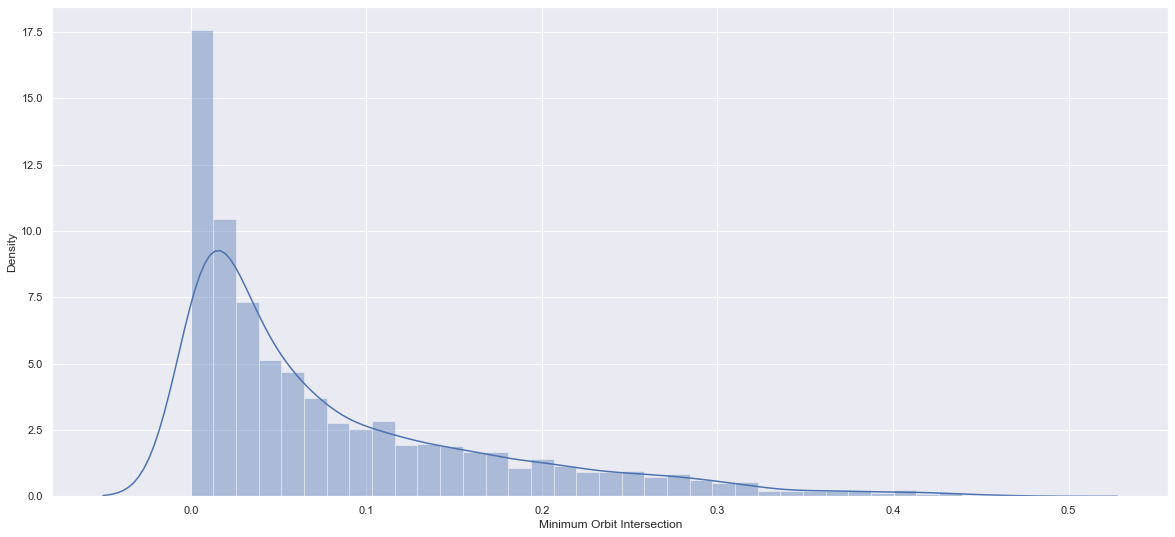

In [124]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Minimum Orbit Intersection'])
plt.show()

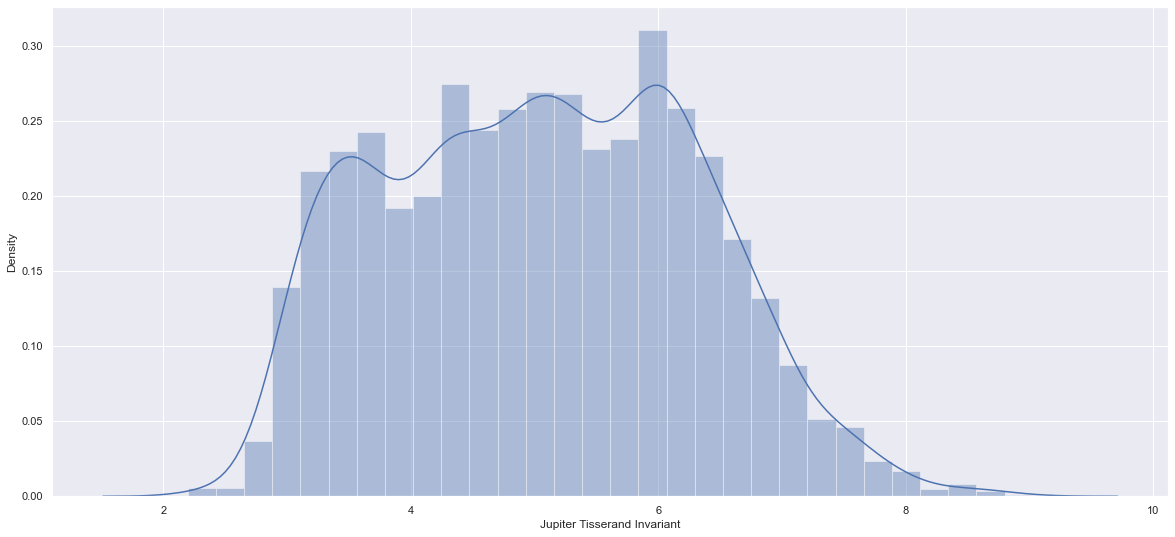

In [125]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Jupiter Tisserand Invariant'])
plt.show()

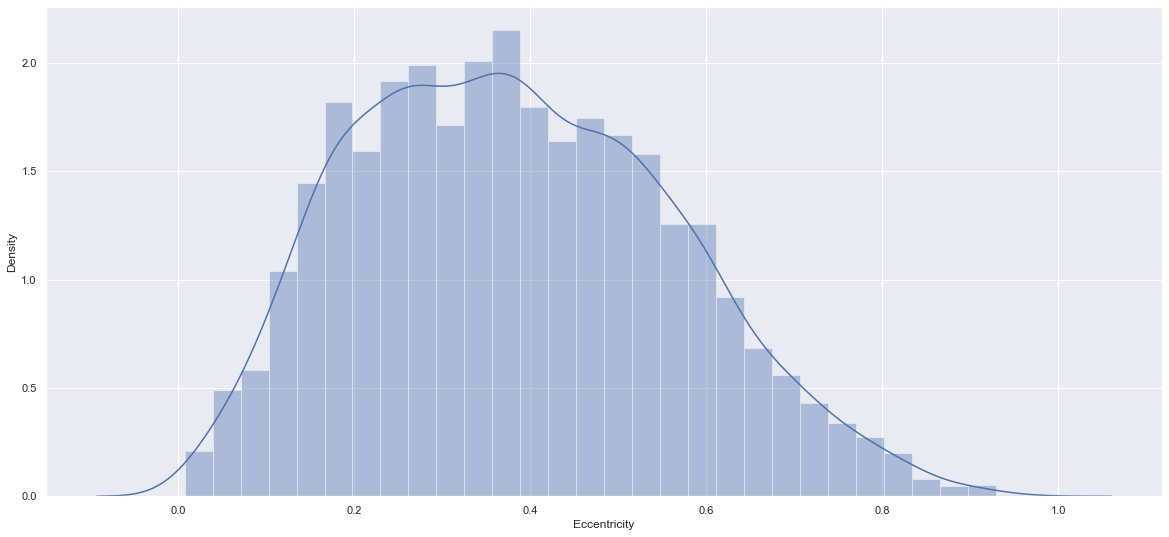

In [126]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Eccentricity'])
plt.show()

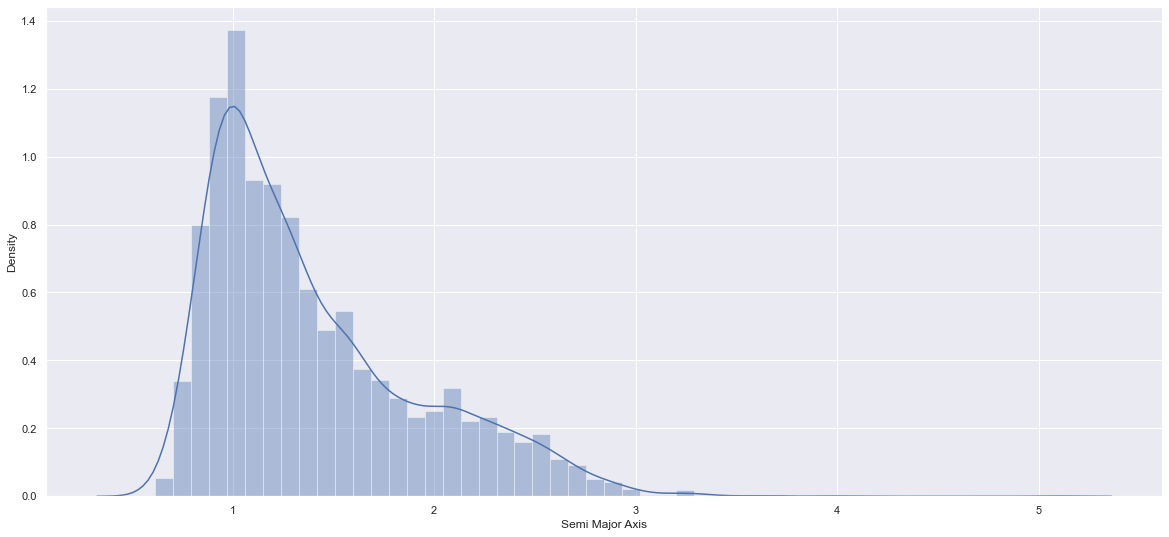

In [127]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Semi Major Axis'])
plt.show()

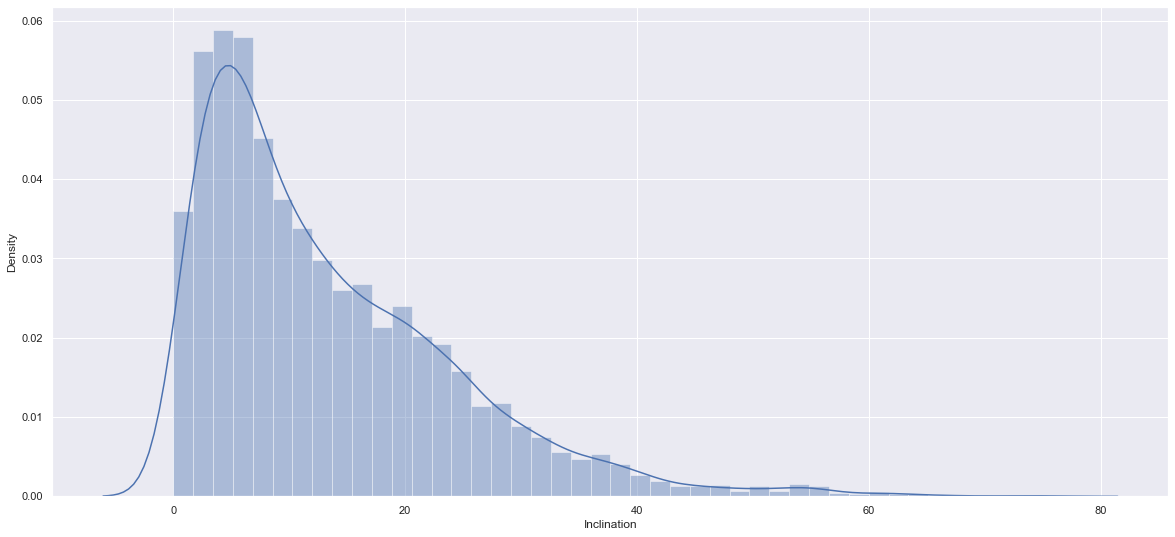

In [128]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Inclination'])
plt.show()

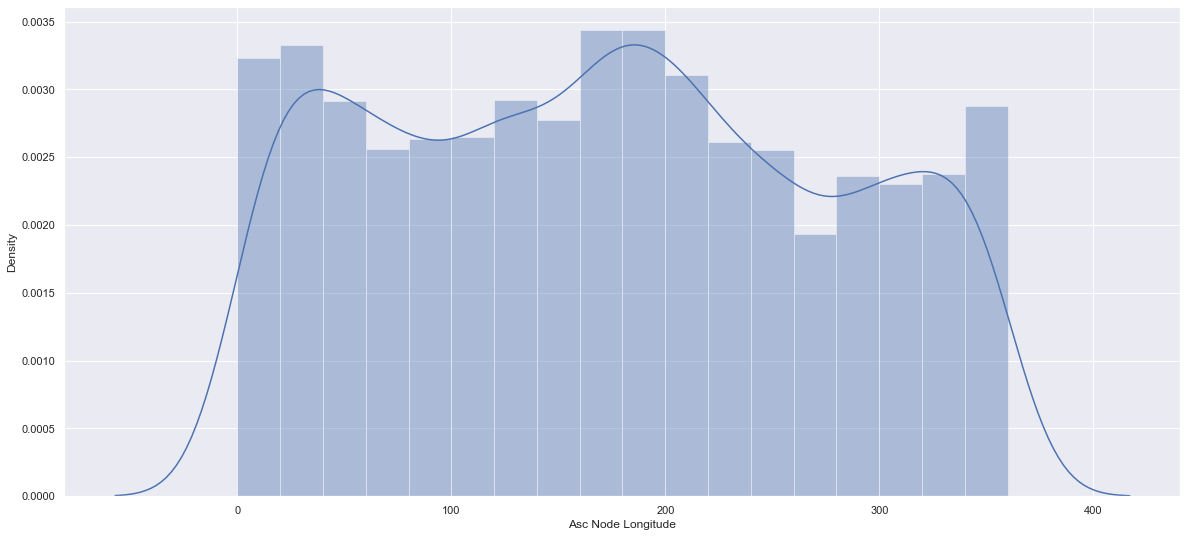

In [129]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Asc Node Longitude'])
plt.show()

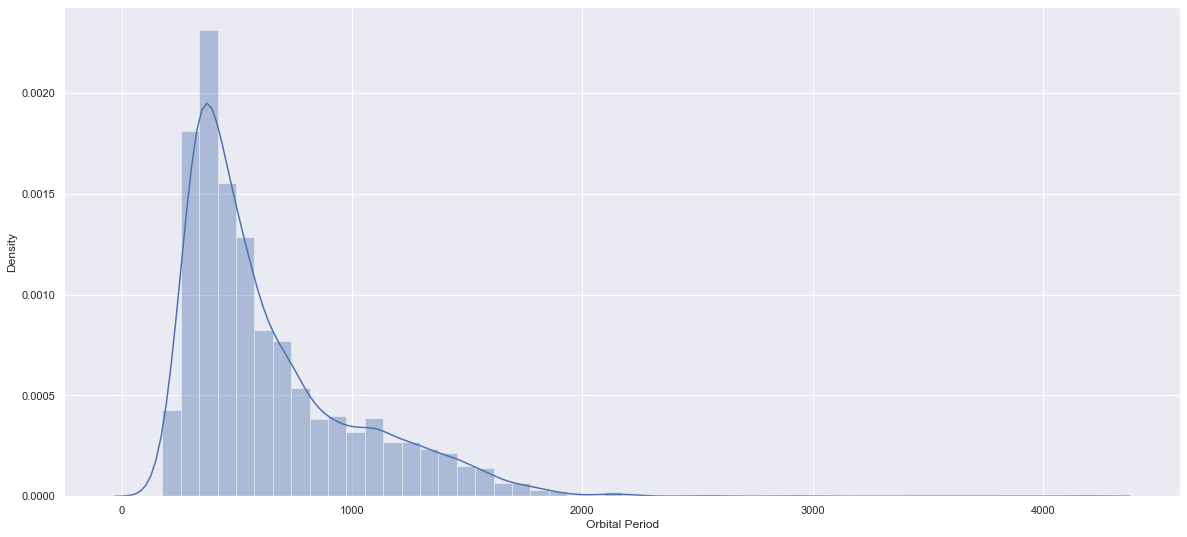

In [130]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Orbital Period'])
plt.show()

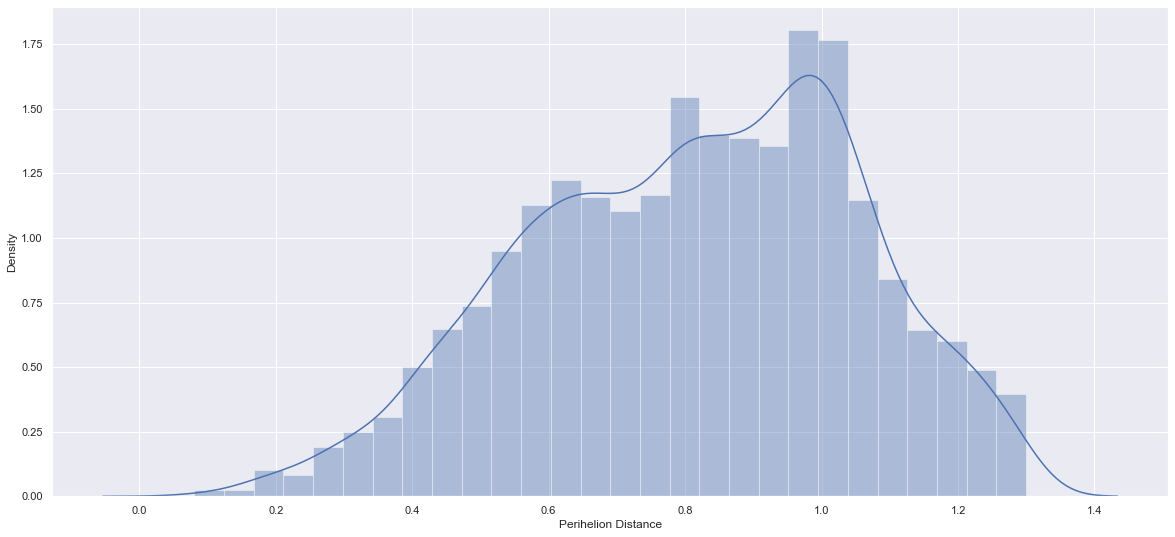

In [131]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Perihelion Distance'])
plt.show()

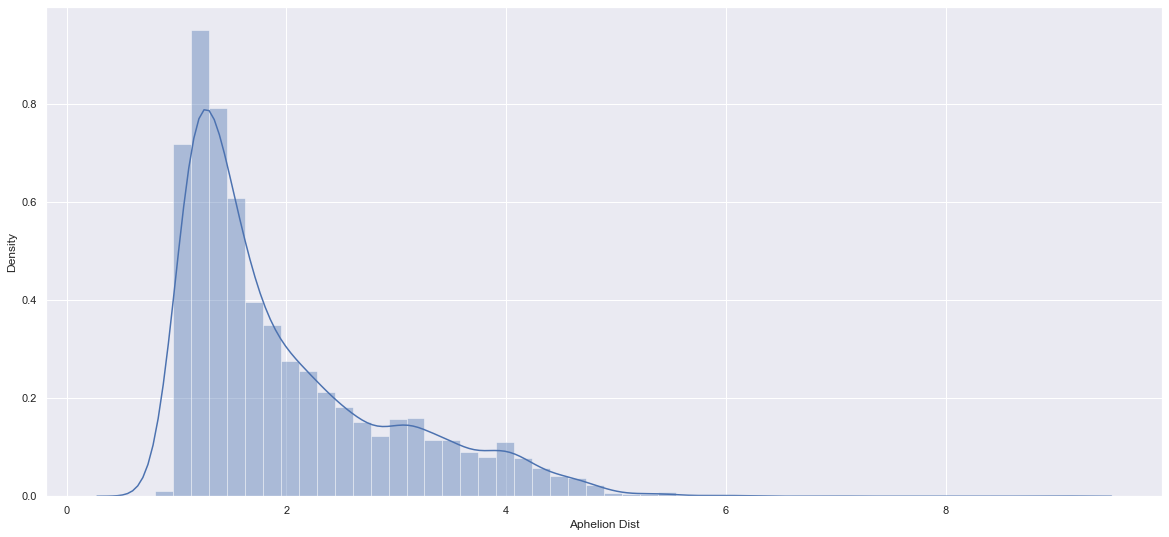

In [132]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Aphelion Dist'])
plt.show()

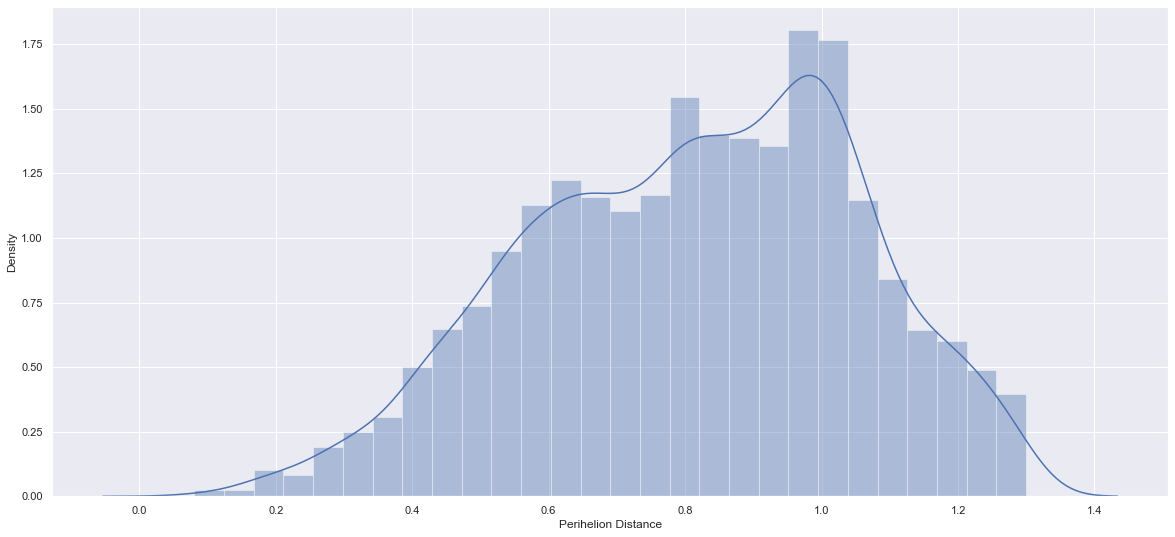

In [133]:
plt.subplots(figsize=(20,9))
sns.distplot(df['Perihelion Distance'])
plt.show()

# Heatmap

<AxesSubplot:>

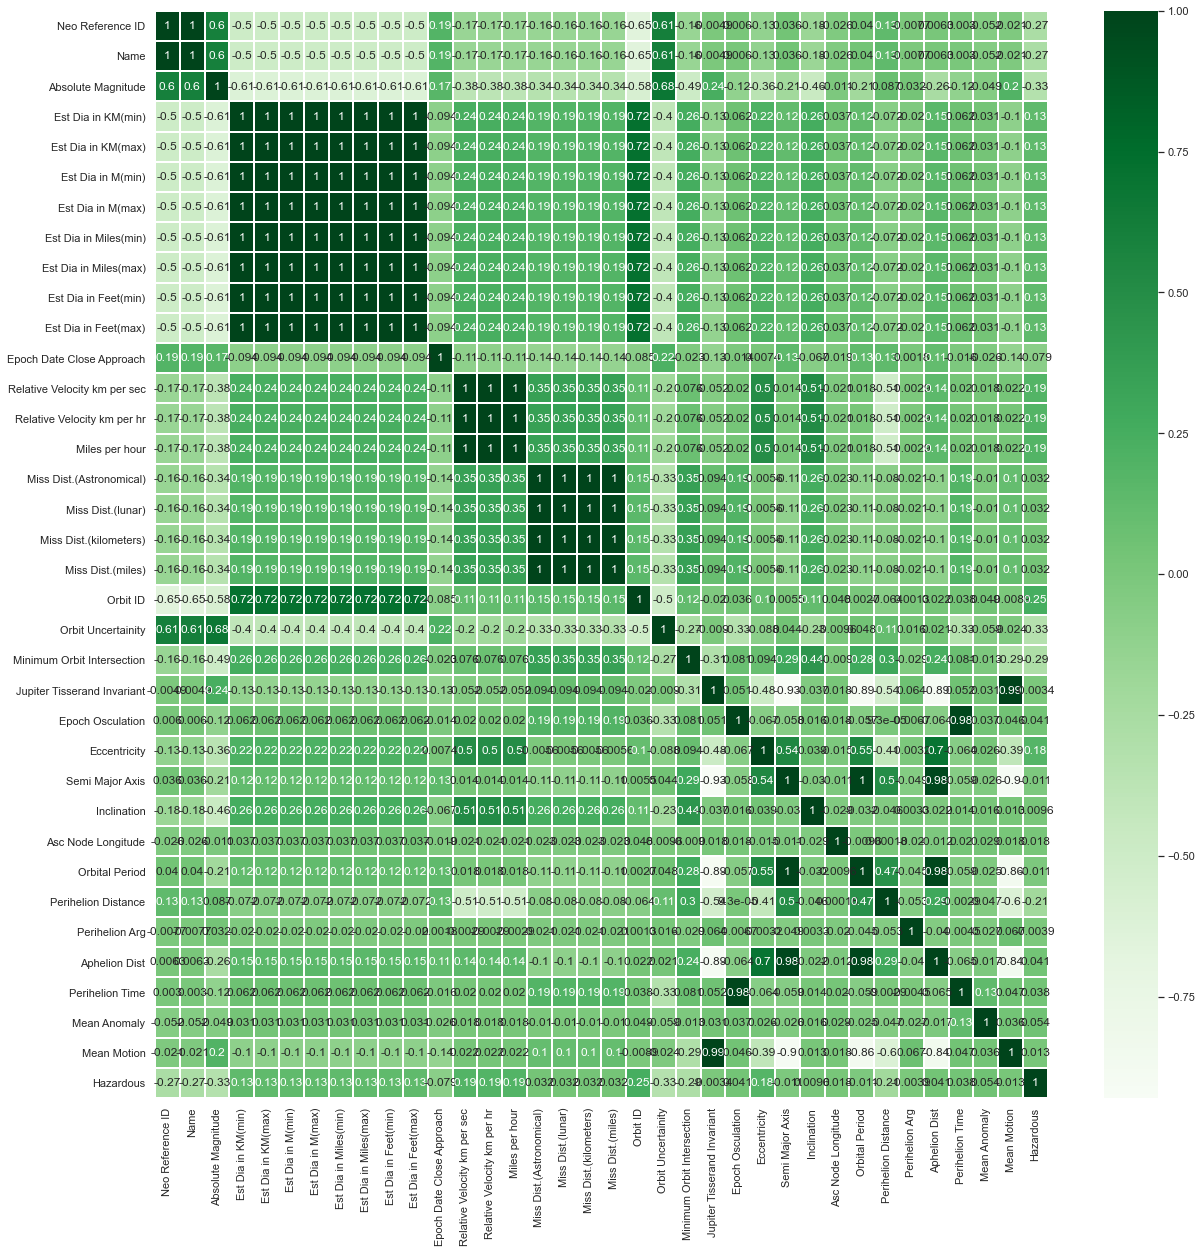

In [134]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot= True, linewidth=1, cmap='Greens')

In [135]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# Dropping Useless columns

In [136]:
df = df.drop(columns=['Close Approach Date','Epoch Date Close Approach','Orbit Determination Date','Equinox','Orbiting Body'])

In [137]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


# X and y Split

In [138]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [139]:
X.shape

(4687, 34)

In [140]:
X

array([[3.70308000e+06, 3.70308000e+06, 2.16000000e+01, ...,
        2.45816164e+06, 2.64837533e+02, 5.90551388e-01],
       [3.72395500e+06, 3.72395500e+06, 2.13000000e+01, ...,
        2.45779497e+06, 1.73741112e+02, 8.45329788e-01],
       [2.44686200e+06, 2.44686200e+06, 2.03000000e+01, ...,
        2.45812047e+06, 2.92893654e+02, 5.59370820e-01],
       ...,
       [3.75971400e+06, 3.75971400e+06, 2.27000000e+01, ...,
        2.45830048e+06, 2.03501147e+02, 5.21698091e-01],
       [3.75972000e+06, 3.75972000e+06, 2.18000000e+01, ...,
        2.45828826e+06, 2.03524965e+02, 5.43766938e-01],
       [3.77297800e+06, 3.77297800e+06, 1.91090000e+01, ...,
        2.45831859e+06, 1.84820424e+02, 5.50728945e-01]])

In [141]:
y

array([ True, False,  True, ..., False, False, False])

# Train Test Split

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN Architecture with 6 Hidden layers

In [144]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=150, activation='relu'))
ann.add(tf.keras.layers.Dense(units=75, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Using RMSprop Architecture 

In [145]:
ann.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [146]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
118/118 [==============================] - 0s 4ms/step - loss: 0.2955 - accuracy: 0.8661
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9266
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9448
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 

118/118 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 72/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 73/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9971
Epoch 74/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9992
Epoch 75/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9981
Epoch 76/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9987
Epoch 77/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 78/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9989
Epoch 79/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 80/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 

# Accuracy and Loss plot

In [147]:
import plotly.express as px

fig = px.line(y=history.history['accuracy'])
fig.show()
fig = px.line(y=history.history['loss'])
fig.show()

# Prediction

In [148]:
y_pred = ann.predict(X_test)

y_pred = (y_pred > 0.5)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


# Confusion Matrix

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[785   8]
 [ 14 131]]


<AxesSubplot:>

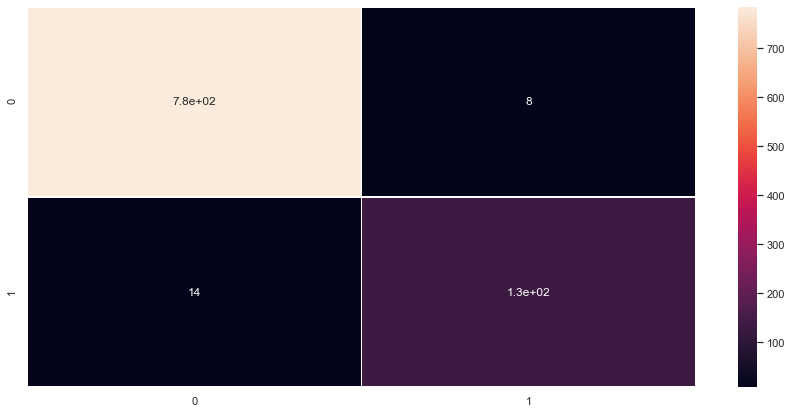

In [150]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,linewidth=1)

# Accuracy

In [151]:
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.976545842217484


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       793
        True       0.94      0.90      0.92       145

    accuracy                           0.98       938
   macro avg       0.96      0.95      0.95       938
weighted avg       0.98      0.98      0.98       938



# This Model can Successfully Classify whether an Asteroids is Hazardous or Not with an Accuracy of 97.6%